Attribution 4.0 International (CC BY 4.0)

https://creativecommons.org/licenses/by/4.0/

In [1]:
import pandas
print('pandas',pandas.__version__)
import glob
import pickle
import numpy
import seaborn
import time
import datetime
import matplotlib.pyplot as plt

pandas 0.23.4


In [2]:
list_of_dat = glob.glob('data_synthesized_from_csvs/count_of_models_per_day/count_of_models_on_*.dat')
print(len(list_of_dat))

2092


In [3]:
list_of_df=[]
start_time = time.time()
for path_to_dat in list_of_dat:
    date_str = path_to_dat[:-len('.dat')].split('_')[-1]
    date_as_dt = datetime.datetime.strptime(date_str, '%Y-%m-%d')
#    print(path_to_dat)
    try:
        df = pandas.read_csv(path_to_dat,header=None)
        df.columns=[date_as_dt,'model']
        df=df.set_index('model')
        list_of_df.append(df)
    except:
        print(path_to_dat)
print('elapsed:',time.time()-start_time,'seconds')

data_synthesized_from_csvs/count_of_models_per_day/count_of_models_on_2014__2014_2014-11-02.dat
data_synthesized_from_csvs/count_of_models_per_day/count_of_models_on_Q1_2017__2017-01-30.dat
data_synthesized_from_csvs/count_of_models_per_day/count_of_models_on_2015__2015_2015-11-01.dat


In [4]:
df = pandas.concat(list_of_df,sort=False,axis=1) # join all the dataframes into a single df
df = df.reindex(sorted(df.columns), axis=1) # order columns by calendar date

In [5]:
df.shape

(113, 2089)

In [6]:
sorted_df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]

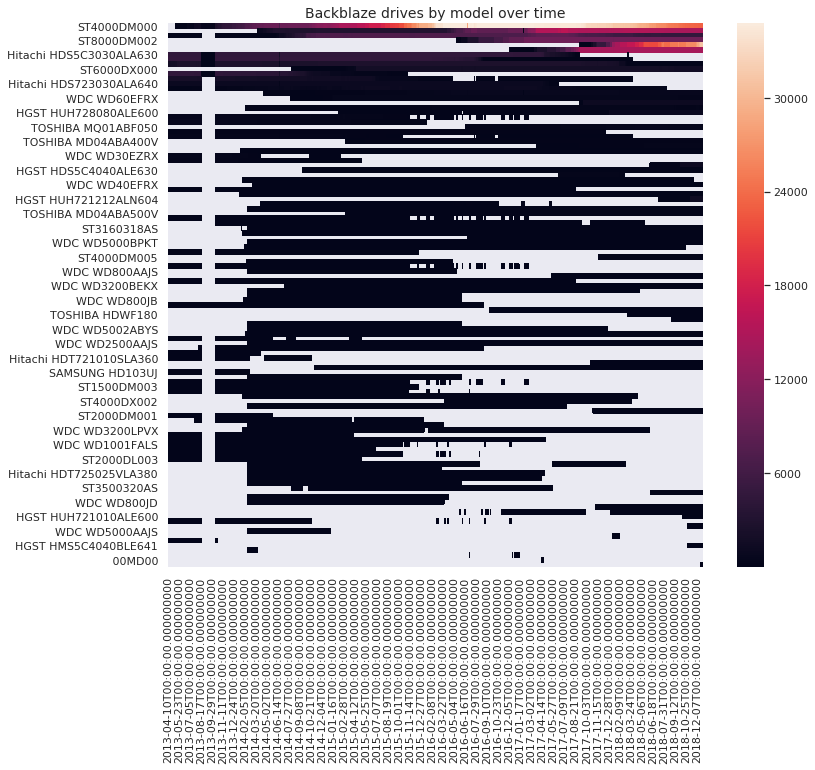

In [7]:
seaborn.set(rc={'figure.figsize':(12,10)})
seaborn.heatmap(sorted_df);
plt.title('Backblaze drives by model over time',fontsize=14);

In [11]:
len(df.sum(axis=1).sort_values(ascending=False))

113

In [13]:
pandas.options.display.max_rows = 999

In [14]:
df.sum(axis=1).sort_values(ascending=False)

ST4000DM000                            45198052.0
HGST HMS5C4040BLE640                   14872956.0
HGST HMS5C4040ALE640                   10612497.0
ST8000DM002                             8198926.0
ST12000NM0007                           8093190.0
ST8000NM0055                            7904863.0
Hitachi HDS5C3030ALA630                 6641559.0
Hitachi HDS722020ALA330                 5306511.0
Hitachi HDS5C4040ALE630                 4400563.0
ST6000DX000                             2517471.0
ST3000DM001                             2205148.0
ST31500541AS                            1445217.0
Hitachi HDS723030ALA640                 1429666.0
WDC WD30EFRX                            1271769.0
ST500LM012 HN                            887354.0
WDC WD60EFRX                             653501.0
ST10000NM0086                            566937.0
WDC WD5000LPVX                           451588.0
HGST HUH728080ALE600                     426811.0
WDC WD10EADS                             370505.0
